In [2]:
# DataVis Project 
# Project 

# author: LeAnn Lindsey
# date: Nov 23, 2020

# Import libraries
import pandas as pd
import numpy as np
import math
import random as random
from numpy.random import randint
from sklearn.naive_bayes import ComplementNB

import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import tree

In [3]:
# Import data from csv file

path='/Users/leannmlindsey/Dropbox/University_of_Utah/5630Visualization/FinalProject/dataviscourse-pr-Visualization-of-Metagenomic-Data/data'

# read in the genefamilies data 
genefamilies_stratified = pd.read_csv(path + '/raw/combined_genefamilies_stratified_Monarch.tsv', delimiter='\t')
genefamilies_unstratified = pd.read_csv(path + '/raw/combined_genefamilies_unstratified_Monarch.tsv', delimiter='\t')

# read in the pathabundance data
pathabundance_stratified = pd.read_csv(path + '/raw/combined_pathabundance_stratified_Monarch.tsv', delimiter='\t')
pathabundance_unstratified = pd.read_csv(path + '/raw/combined_pathabundance_unstratified_Monarch.tsv', delimiter='\t')

# read in the taxonomy data
stackedBar = pd.read_csv(path + '/taxonomyInputFile.csv', delimiter=',')

print(pathabundance_stratified)
genefamilies_stratified=genefamilies_stratified.rename(columns={'#GeneFamily': 'GeneFamily'})

genefamilies_stratified


                                            Genefamily  Monarch_Wild_248  \
0    UNINTEGRATED|g__Bacteroides.s__Bacteroides_uni...          0.000000   
1    UNINTEGRATED|g__Bacteroides.s__Bacteroides_uni...          0.000000   
2    UNINTEGRATED|g__Lactobacillus.s__Lactobacillus...      14521.121079   
3    UNINTEGRATED|g__Lactobacillus.s__Lactobacillus...      10278.032251   
4    UNINTEGRATED|g__Lactobacillus.s__Lactobacillus...          0.000000   
..                                                 ...               ...   
835  VALSYN-PWY: L-valine biosynthesis|g__Bacteroid...          0.000000   
836  VALSYN-PWY: L-valine biosynthesis|g__Pseudomon...          0.000000   
837  VALSYN-PWY: L-valine biosynthesis|g__Serratia....          0.000000   
838  VALSYN-PWY: L-valine biosynthesis|g__Yersinia....          0.000000   
839     VALSYN-PWY: L-valine biosynthesis|unclassified       1203.954417   

     Monarch_Wild_249  Monarch_Wild_250  Monarch_Wild_251  Monarch_Wild_252  \
0       

,GeneFamily,RM-248_S54_L001_R1R2_001_Abundance-RPKs,RM-249_S62_L001_R1R2_001_Abundance-RPKs,RM-250_S70_L001_R1R2_001_Abundance-RPKs,RM-251_S78_L001_R1R2_001_Abundance-RPKs,RM-252_S86_L001_R1R2_001_Abundance-RPKs,RM-253_S94_L001_R1R2_001_Abundance-RPKs,RM-254_S7_L001_R1R2_001_Abundance-RPKs,RM-255_S15_L001_R1R2_001_Abundance-RPKs,RM-256_S23_L001_R1R2_001_Abundance-RPKs,...,RM-252_S86_L001_R1R2_001_Abundance-RPKs.3,RM-253_S94_L001_R1R2_001_Abundance-RPKs.3,RM-254_S7_L001_R1R2_001_Abundance-RPKs.3,RM-255_S15_L001_R1R2_001_Abundance-RPKs.3,RM-256_S23_L001_R1R2_001_Abundance-RPKs.3,RM-257_S31_L001_R1R2_001_Abundance-RPKs.3,RM-258_S39_L001_R1R2_001_Abundance-RPKs.3,RM-259_S47_L001_R1R2_001_Abundance-RPKs.3,RM-260_S55_L001_R1R2_001_Abundance-RPKs.3,RM-261_S63_L001_R1R2_001_Abundance-RPKs.3
0,UniRef90_A0A010NNX1|unclassified,0.000000,2.124592,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
1,UniRef90_A0A010PLT3|unclassified,0.000000,10.165201,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
2,UniRef90_A0A010RNY9|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.544703
3,UniRef90_A0A010S6N4|g__Pseudomonas.s__Pseudomo...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,8.362060
4,UniRef90_A0A010SIG9|g__Pseudomonas.s__Pseudomo...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,3.201630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,UniRef90_X8K659|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.389697,0.000000,0.000000,0.0,0.000000
280316,UniRef90_Z4WPM6|unclassified,6.133065,9.618189,5.289013,4.556361,2.4557,0.0,13.743734,4.483459,13.858555,...,0.274285,0.0,1.32777,0.448623,1.35639,0.371479,0.374625,0.415837,0.0,1.370240
280317,UniRef90_Z4WXH7|unclassified,0.000000,0.000000,0.000000,11.910671,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
280318,UniRef90_Z4WXN7|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,14.861236,0.000000,17.434731,...,0.000000,0.0,1.43573,0.000000,1.70640,0.000000,0.000000,0.000000,0.0,0.000000


In [78]:
# transpose the taxonomy data to be the correct format for the stacked bar chart 
stackedBarT= stackedBar.T
print(stackedBarT)
stackedBarT.to_csv(path + '/stackedBarInputFullT_FINAL.csv',index=True)


                               0                        1    \
id                        Bacteria  Bacteria.Actinobacteria   
NoMonarch_Wild_261         98.4238                    1.945   
NoMonarch_Wild_260             100                  2.41768   
NoMonarch_Experiment_259   99.7318                   0.0884   
NoMonarch_Experiment_258   99.8639                  0.36162   
NoMonarch_Experiment_257   99.8812                  0.25209   
NoMonarch_Experiment_256   99.3755                  0.07458   
Monarch_Experiment_255         100                  0.28683   
Monarch_Experiment_254         100                  7.58119   
Monarch_Wild_253           95.1388                  21.1126   
Monarch_Wild_252           94.3337                  7.76511   
Monarch_Wild_251               100                  26.7577   
Monarch_Wild_250            97.909                  1.55778   
Monarch_Wild_249               100                  29.6395   
Monarch_Wild_248               100                  10.

In [4]:
# takes as input a dataframe, a full file path and a filename and flattens the matrix and saves it
def flattenMatrix(data, path, filename):
    counter=0
    column=''
    row=''
    value=0
    condition=''
    list=[]
    table=[]
   
    for i in range(len(data.GeneFamily)):
        for j in range(len(data.columns)-1):
            #print("column",data.GeneFamily[i])
            #print("row",data.columns[j+1])
            #print("value", data.iloc[i,j+1])
            column=data.GeneFamily[i]
            row=data.columns[j+1]
            value=data.iloc[i,j+1]
            counter=counter+1
            if ('NoMonarch' in row):
                print('there is a match')
                condition = 'No-Monarch'
            else:
                condition = 'Monarch'
                
            list=[column,row,value,condition]
            table.append(list)     
    print(len(data.GeneFamily))
    print(len(data.columns)-1)
    print(counter)
    print(table)
    df = pd.DataFrame(table, columns = ['GeneFamily', 'Sample', 'Value', 'Condition'])

    #path='/Users/leannmlindsey/Dropbox/University_of_Utah/5630Visualization/FinalProject/heatmapTest/data'

    #df.to_csv(path + '/flatHeatmapData2300.csv',index=False)
    df.to_csv(path + '/' + filename,index=False)

In [80]:
#flattenMatrix (data, path, 'flatHeatMapCondition.csv')

In [5]:
# set thresholds to select rows that have values >threshholdLevel in at least thresholdCount columns 
# returns a filtered dataframe
def filterData_Thresholds(data, thresholdLevel, thresholdCount):
    counter=0
    newData=[]
    for i in range(len(data.GeneFamily)):
        for j in range(len(data.columns)-1):
            #print("column",data.GeneFamily[i])
            #print("row",data.columns[j+1])
            #print("value", data.iloc[i,j+1])
            column=data.GeneFamily[i]
            row=data.columns[j+1]
            value=data.iloc[i,j+1]
            if value>thresholdLevel:
                counter=counter+1
            else:
                pass
        if counter>thresholdCount:
            newData.append(i)
            #print(data.GeneFamily[i])
            counter=0
        else:
            counter=0
    print(newData)
    # newData is the list of indexes of the rows to include
    data_filtered=data.iloc[newData]
    print(data_filtered)
    # need to reset the index of the new dataframe so it can be flattened
    data_filtered_indexed=data_filtered.reset_index()
    print(data_filtered_indexed)
    return data_filtered_indexed

In [82]:
data = genefamilies_stratified 
data

,GeneFamily,RM-248_S54_L001_R1R2_001_Abundance-RPKs,RM-249_S62_L001_R1R2_001_Abundance-RPKs,RM-250_S70_L001_R1R2_001_Abundance-RPKs,RM-251_S78_L001_R1R2_001_Abundance-RPKs,RM-252_S86_L001_R1R2_001_Abundance-RPKs,RM-253_S94_L001_R1R2_001_Abundance-RPKs,RM-254_S7_L001_R1R2_001_Abundance-RPKs,RM-255_S15_L001_R1R2_001_Abundance-RPKs,RM-256_S23_L001_R1R2_001_Abundance-RPKs,...,RM-252_S86_L001_R1R2_001_Abundance-RPKs.3,RM-253_S94_L001_R1R2_001_Abundance-RPKs.3,RM-254_S7_L001_R1R2_001_Abundance-RPKs.3,RM-255_S15_L001_R1R2_001_Abundance-RPKs.3,RM-256_S23_L001_R1R2_001_Abundance-RPKs.3,RM-257_S31_L001_R1R2_001_Abundance-RPKs.3,RM-258_S39_L001_R1R2_001_Abundance-RPKs.3,RM-259_S47_L001_R1R2_001_Abundance-RPKs.3,RM-260_S55_L001_R1R2_001_Abundance-RPKs.3,RM-261_S63_L001_R1R2_001_Abundance-RPKs.3
0,UniRef90_A0A010NNX1|unclassified,0.000000,2.124592,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
1,UniRef90_A0A010PLT3|unclassified,0.000000,10.165201,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
2,UniRef90_A0A010RNY9|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.544703
3,UniRef90_A0A010S6N4|g__Pseudomonas.s__Pseudomo...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,8.362060
4,UniRef90_A0A010SIG9|g__Pseudomonas.s__Pseudomo...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,3.201630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,UniRef90_X8K659|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.389697,0.000000,0.000000,0.0,0.000000
280316,UniRef90_Z4WPM6|unclassified,6.133065,9.618189,5.289013,4.556361,2.4557,0.0,13.743734,4.483459,13.858555,...,0.274285,0.0,1.32777,0.448623,1.35639,0.371479,0.374625,0.415837,0.0,1.370240
280317,UniRef90_Z4WXH7|unclassified,0.000000,0.000000,0.000000,11.910671,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
280318,UniRef90_Z4WXN7|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,14.861236,0.000000,17.434731,...,0.000000,0.0,1.43573,0.000000,1.70640,0.000000,0.000000,0.000000,0.0,0.000000


In [83]:
filtered_data = filterData_Thresholds(data, 10, 3)

[13, 26, 49, 60, 65, 66, 71, 81, 84, 92, 112, 117, 130, 131, 132, 138, 158, 181, 186, 216, 228, 236, 243, 247, 249, 252, 272, 278, 284, 292, 293, 296, 311, 318, 322, 364, 448, 451, 462, 476, 520, 524, 537, 538, 551, 555, 563, 564, 565, 580, 599, 606, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 624, 625, 626, 628, 629, 630, 631, 632, 633, 634, 635, 636, 638, 639, 640, 641, 642, 643, 644, 646, 647, 648, 650, 651, 652, 653, 654, 655, 656, 658, 659, 660, 661, 662, 663, 664, 666, 667, 669, 670, 671, 673, 674, 675, 679, 680, 681, 682, 684, 685, 686, 688, 689, 690, 691, 693, 694, 695, 696, 697, 698, 699, 700, 701, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 715, 716, 720, 721, 722, 724, 725, 727, 728, 729, 733, 737, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 760, 762, 763, 764, 765, 766, 767, 768, 772, 773, 774, 775, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 795, 796, 799, 800, 801, 802, 803, 804, 806,

In [84]:
#flattenMatrix(pathabundance_stratified, path, 'pathabundance_stratifiedFINAL.csv')

#things that I did by hand, change the names of the fields to human recognizable and condition based
#change pathways to GeneFamily
#change # Gene Family to GeneFamily



In [85]:
filtered_data.values

array([[13, 'UniRef90_A0A010YVA5|unclassified', 0.0, ..., 0.598133,
        2.36888, 0.0],
       [26, 'UniRef90_A0A011A5D6|unclassified', 16.6342276633, ...,
        0.451812, 3.30015, 0.624379],
       [49, 'UniRef90_A0A011UG04|unclassified', 0.0, ..., 0.560318, 0.0,
        0.0],
       ...,
       [280281, 'UniRef90_X6G117|unclassified', 11.1111111111, ..., 0.0,
        1.33283, 0.0],
       [280282, 'UniRef90_X6JW98|unclassified', 2.5035654873, ..., 0.0,
        0.822315, 0.0],
       [280307, 'UniRef90_X8K3U5|unclassified', 12.3003254178, ..., 0.0,
        1.1448, 0.5742229999999999]], dtype=object)

In [86]:
# compute the SVD for geneFamilies
from scipy import linalg

data = filtered_data



features=data.iloc[:,2:]
features.values

U, s, Vh = linalg.svd(features)
U.shape,  s.shape, Vh.shape

((66672, 66672), (56,), (56, 56))

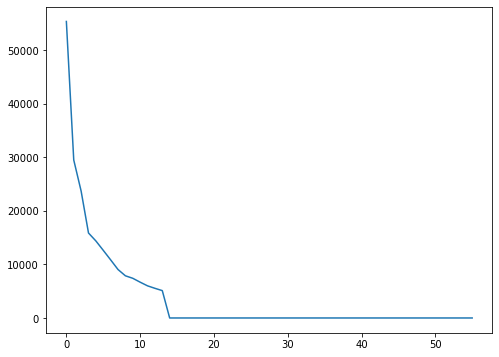

In [87]:
# plot the singularity diagonal of the SVD
# 14 Monarch samples of mixed classes singularity graph
fig2 = plt.figure(figsize=(8,6))
#print(s)
plt.plot(s)
plt.show()

In [90]:
# Truncate the most significant genes 
N=features.shape[0]
cutoff = (4/np.sqrt(3)) * np.sqrt(N) # Hard threshold
print(cutoff)

r = np.max(np.where(s > cutoff)) # keep modes w/ sig > cutoff

sigFeatures = U[:,:(r+1)] @ np.diag(s[:(r+1)]) @ Vh[:(r+1),:]



596.3086449146953


In [91]:
sigFeatures.shape

(66672, 56)

In [92]:
features2 = U[:,:(r+1)] @ np.diag(s[:(r+1)]) @ Vh[:(r+1),:]

In [93]:
features3=pd.DataFrame(features2)

In [94]:
features3.describe()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
count,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,...,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04,6.667200e+04
mean,2.363817e+01,1.908403e+01,1.592826e+01,2.052466e+01,1.633644e+01,1.328436e+01,2.667334e+01,2.143362e+01,2.873408e+01,2.763543e+01,...,1.824671e+00,1.566631e+00,2.576891e+00,2.144686e+00,2.812310e+00,2.849952e+00,2.077389e+00,2.073040e+00,1.644909e+00,1.346168e+00
std,3.540365e+01,3.408661e+01,5.068677e+01,3.693588e+01,3.503490e+01,2.979989e+01,5.654374e+01,3.530193e+01,6.673186e+01,4.679471e+01,...,3.913165e+00,3.514315e+00,5.462647e+00,3.532374e+00,6.531292e+00,4.825787e+00,5.667154e+00,7.895527e+00,5.622933e+00,3.480669e+00
min,-3.313613e-06,-1.361205e-06,-2.885509e-06,-5.962247e-07,-3.346039e-06,-1.192144e-06,-3.794886e-06,-4.254463e-06,-1.300038e-06,-3.080056e-06,...,-3.053788e-05,-9.415074e-06,-1.843832e-05,-5.283164e-05,-4.101086e-05,-1.452842e-05,-7.116339e-06,-1.124140e-04,-1.777955e-05,-5.130464e-05
25%,5.961824e-08,1.258320e-08,2.450642e-09,1.348413e-08,7.569399e-10,2.386106e-09,6.184017e-08,3.759232e-08,3.403258e-08,7.086813e-08,...,1.426844e-07,-3.399835e-08,8.693681e-07,7.042450e-07,3.611392e-07,8.500187e-07,1.426644e-07,-3.935142e-08,1.230829e-07,5.402371e-07
50%,1.519474e+01,1.119135e+01,9.888374e+00,1.301554e+01,7.204779e+00,6.288895e-08,1.698572e+01,1.423412e+01,1.334107e+01,1.651595e+01,...,8.047262e-01,3.571876e-07,1.640977e+00,1.424292e+00,1.305740e+00,1.703237e+00,1.050253e+00,1.070803e+00,9.629052e-01,7.981252e-01
75%,2.946941e+01,2.449351e+01,2.060403e+01,2.640755e+01,1.932791e+01,1.651014e+01,3.561429e+01,2.817740e+01,3.750558e+01,3.528652e+01,...,2.158798e+00,1.947049e+00,3.440670e+00,2.819481e+00,3.670809e+00,3.638985e+00,2.286685e+00,2.392301e+00,2.014641e+00,1.817090e+00
max,2.006803e+03,1.645925e+03,7.696285e+03,3.676525e+03,1.529455e+03,2.000000e+03,7.506757e+03,2.506993e+03,7.533604e+03,4.028129e+03,...,1.708299e+02,2.358610e+02,7.252220e+02,2.508540e+02,7.373417e+02,4.154079e+02,7.778575e+02,1.025649e+03,8.713912e+02,4.288580e+02


In [95]:
features3.shape

(66672, 56)

In [96]:
def SVD (data, path, filename):
    # compute the SVD for geneFamilies
    from scipy import linalg
    features=data.iloc[:,1:]
    features

    U, s, Vh = linalg.svd(features)
    U.shape,  s.shape, Vh.shape
    
    # plot the singularity diagonal of the SVD

    fig2 = plt.figure(figsize=(8,6))
    #print(s)
    plt.plot(s)
    plt.show()
    
    # Truncate the most significant genes 
    N=features.shape[0]
    cutoff = (4/np.sqrt(3)) * np.sqrt(N) # Hard threshold
    #cutoff = 1000
    r = np.max(np.where(s > cutoff)) # keep modes w/ sig > cutoff

    sigFeatures = U[:,:(r+1)] @ np.diag(s[:(r+1)]) @ Vh[:(r+1),:]
    sigFeatures
    features2 = U[:,:(r+1)] @ np.diag(s[:(r+1)]) @ Vh[:(r+1),:]
    features3=pd.DataFrame(features2)
    features3.describe()
    features3.shape
    df.to_csv(path + '/' + filename,index=False)

    

In [ ]:
#SVD(genefamilies_stratified,path,'genefamilies_stratifiedSVD.csv')

In [6]:
#differentially expressed genes from edgeR

# Import data from csv file

path='/Users/leannmlindsey/Dropbox/University_of_Utah/5630Visualization/FinalProject/dataviscourse-pr-Visualization-of-Metagenomic-Data/data'

# read in the genefamilies data 
upReg = pd.read_csv(path + '/raw/sigDownReg_Monarch.csv', delimiter=',', index_col=0) 
downReg= pd.read_csv(path + '/raw/sigUpReg_Monarch.csv', delimiter=',', index_col=0)


In [7]:
upReg

,logFC,logCPM,PValue,FDR
UniRef90_A0A318HVZ9|unclassified,-8.701887,4.148970,0.000139,0.279621
UniRef90_UPI000EF62AB3|unclassified,-8.597784,4.050737,0.000004,0.105733
UniRef90_A0A1Q6HZX7|unclassified,-8.315415,3.789239,0.000686,0.279621
UniRef90_V2ZDI8|unclassified,-8.295713,3.771006,0.000458,0.279621
UniRef90_A0A1Q6EJG5|unclassified,-8.255231,3.733690,0.002996,0.279621
...,...,...,...,...
UniRef90_A0A2C8ENQ1|g__Pseudomonas.s__Pseudomonas_lundensis,11.233852,6.197062,0.000182,0.279621
UniRef90_A0A2C8EW90|g__Pseudomonas.s__Pseudomonas_lundensis,11.409050,6.369778,0.000194,0.279621
UniRef90_A0A105TF73|g__Pseudomonas.s__Pseudomonas_lundensis,11.633888,6.591830,0.001178,0.279621
UniRef90_A0A2S1ETQ1|g__Lactobacillus.s__Lactobacillus_reuteri,11.742857,6.699812,0.000010,0.156567


In [8]:
downReg

,logFC,logCPM,PValue,FDR
UniRef90_A0A2C8EZN6|g__Pseudomonas.s__Pseudomonas_lundensis,11.946409,6.901188,0.001091,0.279621
UniRef90_A0A2S1ETQ1|g__Lactobacillus.s__Lactobacillus_reuteri,11.742857,6.699812,0.000010,0.156567
UniRef90_A0A105TF73|g__Pseudomonas.s__Pseudomonas_lundensis,11.633888,6.591830,0.001178,0.279621
UniRef90_A0A2C8EW90|g__Pseudomonas.s__Pseudomonas_lundensis,11.409050,6.369778,0.000194,0.279621
UniRef90_A0A2C8ENQ1|g__Pseudomonas.s__Pseudomonas_lundensis,11.233852,6.197062,0.000182,0.279621
...,...,...,...,...
UniRef90_A0A1Q6EJG5|unclassified,-8.255231,3.733690,0.002996,0.279621
UniRef90_V2ZDI8|unclassified,-8.295713,3.771006,0.000458,0.279621
UniRef90_A0A1Q6HZX7|unclassified,-8.315415,3.789239,0.000686,0.279621
UniRef90_UPI000EF62AB3|unclassified,-8.597784,4.050737,0.000004,0.105733


In [9]:
#concat upReg and downReg gene dataframes
diffGenes= upReg.append(downReg)
diffGenes.shape
diffGenes.index
#rename columns to merge on to have the same name
diffGenes.insert(0,column='GeneFamily',value=diffGenes.index)
diffGenes

,GeneFamily,logFC,logCPM,PValue,FDR
UniRef90_A0A318HVZ9|unclassified,UniRef90_A0A318HVZ9|unclassified,-8.701887,4.148970,0.000139,0.279621
UniRef90_UPI000EF62AB3|unclassified,UniRef90_UPI000EF62AB3|unclassified,-8.597784,4.050737,0.000004,0.105733
UniRef90_A0A1Q6HZX7|unclassified,UniRef90_A0A1Q6HZX7|unclassified,-8.315415,3.789239,0.000686,0.279621
UniRef90_V2ZDI8|unclassified,UniRef90_V2ZDI8|unclassified,-8.295713,3.771006,0.000458,0.279621
UniRef90_A0A1Q6EJG5|unclassified,UniRef90_A0A1Q6EJG5|unclassified,-8.255231,3.733690,0.002996,0.279621
...,...,...,...,...,...
UniRef90_A0A1Q6EJG5|unclassified,UniRef90_A0A1Q6EJG5|unclassified,-8.255231,3.733690,0.002996,0.279621
UniRef90_V2ZDI8|unclassified,UniRef90_V2ZDI8|unclassified,-8.295713,3.771006,0.000458,0.279621
UniRef90_A0A1Q6HZX7|unclassified,UniRef90_A0A1Q6HZX7|unclassified,-8.315415,3.789239,0.000686,0.279621
UniRef90_UPI000EF62AB3|unclassified,UniRef90_UPI000EF62AB3|unclassified,-8.597784,4.050737,0.000004,0.105733


In [10]:
#rename columns to merge on to have the same name
genefamilies_stratified

,GeneFamily,RM-248_S54_L001_R1R2_001_Abundance-RPKs,RM-249_S62_L001_R1R2_001_Abundance-RPKs,RM-250_S70_L001_R1R2_001_Abundance-RPKs,RM-251_S78_L001_R1R2_001_Abundance-RPKs,RM-252_S86_L001_R1R2_001_Abundance-RPKs,RM-253_S94_L001_R1R2_001_Abundance-RPKs,RM-254_S7_L001_R1R2_001_Abundance-RPKs,RM-255_S15_L001_R1R2_001_Abundance-RPKs,RM-256_S23_L001_R1R2_001_Abundance-RPKs,...,RM-252_S86_L001_R1R2_001_Abundance-RPKs.3,RM-253_S94_L001_R1R2_001_Abundance-RPKs.3,RM-254_S7_L001_R1R2_001_Abundance-RPKs.3,RM-255_S15_L001_R1R2_001_Abundance-RPKs.3,RM-256_S23_L001_R1R2_001_Abundance-RPKs.3,RM-257_S31_L001_R1R2_001_Abundance-RPKs.3,RM-258_S39_L001_R1R2_001_Abundance-RPKs.3,RM-259_S47_L001_R1R2_001_Abundance-RPKs.3,RM-260_S55_L001_R1R2_001_Abundance-RPKs.3,RM-261_S63_L001_R1R2_001_Abundance-RPKs.3
0,UniRef90_A0A010NNX1|unclassified,0.000000,2.124592,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
1,UniRef90_A0A010PLT3|unclassified,0.000000,10.165201,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
2,UniRef90_A0A010RNY9|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.544703
3,UniRef90_A0A010S6N4|g__Pseudomonas.s__Pseudomo...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,8.362060
4,UniRef90_A0A010SIG9|g__Pseudomonas.s__Pseudomo...,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,3.201630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280315,UniRef90_X8K659|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.389697,0.000000,0.000000,0.0,0.000000
280316,UniRef90_Z4WPM6|unclassified,6.133065,9.618189,5.289013,4.556361,2.4557,0.0,13.743734,4.483459,13.858555,...,0.274285,0.0,1.32777,0.448623,1.35639,0.371479,0.374625,0.415837,0.0,1.370240
280317,UniRef90_Z4WXH7|unclassified,0.000000,0.000000,0.000000,11.910671,0.0000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000
280318,UniRef90_Z4WXN7|unclassified,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,14.861236,0.000000,17.434731,...,0.000000,0.0,1.43573,0.000000,1.70640,0.000000,0.000000,0.000000,0.0,0.000000


In [11]:
#merge genefamilies_stratified and diffGenes on column GeneFamily
diffGenesCounts = pd.merge(genefamilies_stratified, diffGenes, on='GeneFamily')

In [12]:
#check the size to make sure that the merge was done properly

diffGenesCounts.shape
diffGenesCounts

,GeneFamily,RM-248_S54_L001_R1R2_001_Abundance-RPKs,RM-249_S62_L001_R1R2_001_Abundance-RPKs,RM-250_S70_L001_R1R2_001_Abundance-RPKs,RM-251_S78_L001_R1R2_001_Abundance-RPKs,RM-252_S86_L001_R1R2_001_Abundance-RPKs,RM-253_S94_L001_R1R2_001_Abundance-RPKs,RM-254_S7_L001_R1R2_001_Abundance-RPKs,RM-255_S15_L001_R1R2_001_Abundance-RPKs,RM-256_S23_L001_R1R2_001_Abundance-RPKs,...,RM-256_S23_L001_R1R2_001_Abundance-RPKs.3,RM-257_S31_L001_R1R2_001_Abundance-RPKs.3,RM-258_S39_L001_R1R2_001_Abundance-RPKs.3,RM-259_S47_L001_R1R2_001_Abundance-RPKs.3,RM-260_S55_L001_R1R2_001_Abundance-RPKs.3,RM-261_S63_L001_R1R2_001_Abundance-RPKs.3,logFC,logCPM,PValue,FDR
0,UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,...,10.5924,8.15185,0.0000,10.7687,5.71212,0.0,8.749721,3.808657,0.000009,0.156567
1,UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,...,10.5924,8.15185,0.0000,10.7687,5.71212,0.0,8.749721,3.808657,0.000009,0.156567
2,UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,5.99568,11.3355,0.0000,0.00000,0.0,7.932559,3.074349,0.003105,0.279621
3,UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,5.99568,11.3355,0.0000,0.00000,0.0,7.932559,3.074349,0.003105,0.279621
4,UniRef90_A0A073JMZ4|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.904038,...,4.4928,4.81898,0.0000,12.1410,0.00000,0.0,8.046101,3.174277,0.000504,0.279621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,UniRef90_V5YUY6|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,12.35850,16.1061,0.0000,0.00000,0.0,8.589487,3.661368,0.001261,0.279621
6294,UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,7.05681,10.8559,0.0000,0.00000,0.0,7.949437,3.089139,0.002997,0.279621
6295,UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,7.05681,10.8559,0.0000,0.00000,0.0,7.949437,3.089139,0.002997,0.279621
6296,UniRef90_W0HK69|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0000,15.69940,11.5490,0.0000,0.00000,0.0,8.430268,3.516823,0.001513,0.279621


In [13]:
diffGenesCounts=diffGenesCounts.iloc[:,0:15]
diffGenesCounts.shape

(6298, 15)

In [14]:
diffGenesCounts

,GeneFamily,RM-248_S54_L001_R1R2_001_Abundance-RPKs,RM-249_S62_L001_R1R2_001_Abundance-RPKs,RM-250_S70_L001_R1R2_001_Abundance-RPKs,RM-251_S78_L001_R1R2_001_Abundance-RPKs,RM-252_S86_L001_R1R2_001_Abundance-RPKs,RM-253_S94_L001_R1R2_001_Abundance-RPKs,RM-254_S7_L001_R1R2_001_Abundance-RPKs,RM-255_S15_L001_R1R2_001_Abundance-RPKs,RM-256_S23_L001_R1R2_001_Abundance-RPKs,RM-257_S31_L001_R1R2_001_Abundance-RPKs,RM-258_S39_L001_R1R2_001_Abundance-RPKs,RM-259_S47_L001_R1R2_001_Abundance-RPKs,RM-260_S55_L001_R1R2_001_Abundance-RPKs,RM-261_S63_L001_R1R2_001_Abundance-RPKs
0,UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,79.046931,0.000000,105.904838,71.428571,0.0
1,UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,79.046931,0.000000,105.904838,71.428571,0.0
2,UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,58.138975,116.793729,0.000000,0.000000,0.0
3,UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,58.138975,116.793729,0.000000,0.000000,0.0
4,UniRef90_A0A073JMZ4|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.904038,46.728695,0.000000,119.401055,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,UniRef90_V5YUY6|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,119.838149,165.946836,0.000000,0.000000,0.0
6294,UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.428550,111.852105,0.000000,0.000000,0.0
6295,UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.428550,111.852105,0.000000,0.000000,0.0
6296,UniRef90_W0HK69|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,152.234396,118.992821,0.000000,0.000000,0.0


In [169]:
diffGenePValues=diffGenesCounts.iloc[:,-4]
diffGenePValues

0         0.000000
1         0.000000
2       116.793729
3       116.793729
4         0.000000
           ...    
6293    165.946836
6294    111.852105
6295    111.852105
6296    118.992821
6297    118.992821
Name: RM-258_S39_L001_R1R2_001_Abundance-RPKs, Length: 6298, dtype: float64

In [15]:
#change sample names to Human Readable 
diffGenesCounts=diffGenesCounts.rename(columns={"RM-248_S54_L001_R1R2_001_Abundance-RPKs": "Monarch_Wild_248", 
                                "RM-249_S62_L001_R1R2_001_Abundance-RPKs": "Monarch_Wild_249",
                                "RM-250_S70_L001_R1R2_001_Abundance-RPKs": "Monarch_Wild_250",
                                "RM-251_S78_L001_R1R2_001_Abundance-RPKs": "Monarch_Wild_251",
                                "RM-252_S86_L001_R1R2_001_Abundance-RPKs": "Monarch_Wild_252",
                                "RM-253_S94_L001_R1R2_001_Abundance-RPKs": "Monarch_Wild_253",
                                "RM-254_S7_L001_R1R2_001_Abundance-RPKs": "Monarch_Experiment_254",
                                "RM-255_S15_L001_R1R2_001_Abundance-RPKs": "Monarch_Experiment_255",
                                "RM-256_S23_L001_R1R2_001_Abundance-RPKs": "NoMonarch_Experiment_256",
                                "RM-257_S31_L001_R1R2_001_Abundance-RPKs": "NoMonarch_Experiment_257",
                                "RM-258_S39_L001_R1R2_001_Abundance-RPKs": "NoMonarch_Experiment_258",
                                "RM-259_S47_L001_R1R2_001_Abundance-RPKs": "NoMonarch_Experiment_259",
                                "RM-260_S55_L001_R1R2_001_Abundance-RPKs": "NoMonarch_Wild_260",
                                "RM-261_S63_L001_R1R2_001_Abundance-RPKs": "NoMonarch_Wild_261"
                               })
diffGenesCounts




,GeneFamily,Monarch_Wild_248,Monarch_Wild_249,Monarch_Wild_250,Monarch_Wild_251,Monarch_Wild_252,Monarch_Wild_253,Monarch_Experiment_254,Monarch_Experiment_255,NoMonarch_Experiment_256,NoMonarch_Experiment_257,NoMonarch_Experiment_258,NoMonarch_Experiment_259,NoMonarch_Wild_260,NoMonarch_Wild_261
0,UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,79.046931,0.000000,105.904838,71.428571,0.0
1,UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,79.046931,0.000000,105.904838,71.428571,0.0
2,UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,58.138975,116.793729,0.000000,0.000000,0.0
3,UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,58.138975,116.793729,0.000000,0.000000,0.0
4,UniRef90_A0A073JMZ4|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.904038,46.728695,0.000000,119.401055,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,UniRef90_V5YUY6|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,119.838149,165.946836,0.000000,0.000000,0.0
6294,UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.428550,111.852105,0.000000,0.000000,0.0
6295,UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.428550,111.852105,0.000000,0.000000,0.0
6296,UniRef90_W0HK69|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,152.234396,118.992821,0.000000,0.000000,0.0


In [16]:
diffGenesCounts.set_index('GeneFamily')

,Monarch_Wild_248,Monarch_Wild_249,Monarch_Wild_250,Monarch_Wild_251,Monarch_Wild_252,Monarch_Wild_253,Monarch_Experiment_254,Monarch_Experiment_255,NoMonarch_Experiment_256,NoMonarch_Experiment_257,NoMonarch_Experiment_258,NoMonarch_Experiment_259,NoMonarch_Wild_260,NoMonarch_Wild_261
GeneFamily,,,,,,,,,,,,,,
UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,79.046931,0.000000,105.904838,71.428571,0.0
UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,79.046931,0.000000,105.904838,71.428571,0.0
UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_entomophaga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,58.138975,116.793729,0.000000,0.000000,0.0
UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_entomophaga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,58.138975,116.793729,0.000000,0.000000,0.0
UniRef90_A0A073JMZ4|g__Lactobacillus.s__Lactobacillus_reuteri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.904038,46.728695,0.000000,119.401055,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UniRef90_V5YUY6|g__Yersinia.s__Yersinia_entomophaga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,119.838149,165.946836,0.000000,0.000000,0.0
UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomophaga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.428550,111.852105,0.000000,0.000000,0.0
UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomophaga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.428550,111.852105,0.000000,0.000000,0.0


In [194]:
#table with all selected differential genes is too large to load so select even smaller subset
#take random selection of 1000 for display purposes 
#randDiffGenesCounts=diffGenesCounts.sample(frac=0.2, replace=True, random_state=1)
#randDiffGenesCounts
#need to reindex
#randDiffGenesCounts.reset_index(drop=True,inplace=True)
#randDiffGenesCounts

,GeneFamily,Monarch_Wild_248,Monarch_Wild_249,Monarch_Wild_250,Monarch_Wild_251,Monarch_Wild_252,Monarch_Wild_253,Monarch_Experiment_254,Monarch_Experiment_255,NoMonarch_Experiment_256,NoMonarch_Experiment_257,NoMonarch_Experiment_258,NoMonarch_Experiment_259,NoMonarch_Wild_260,NoMonarch_Wild_261
0,UniRef90_A7FH83|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.221118,178.192544,0.0,0.0,0.0
1,UniRef90_A0A085U5X6|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84.829222,101.439735,0.0,0.0,0.0
2,UniRef90_A0A210TTA9|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.177323,117.399772,0.0,0.0,0.0
3,UniRef90_A7ZR64|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.928376,111.206544,0.0,0.0,0.0
4,UniRef90_A0A0H2YDC7|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.857455,159.415427,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,UniRef90_A0A210TUS4|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.688344,119.020967,0.0,0.0,0.0
1256,UniRef90_A0A0E1NKJ4|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.697054,170.115307,0.0,0.0,0.0
1257,UniRef90_A0A0T9U5F6|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.713474,153.475534,0.0,0.0,0.0
1258,UniRef90_A0A386HBK3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.973989,130.284256,0.0,0.0,0.0


In [17]:
diffGenesCounts

,GeneFamily,Monarch_Wild_248,Monarch_Wild_249,Monarch_Wild_250,Monarch_Wild_251,Monarch_Wild_252,Monarch_Wild_253,Monarch_Experiment_254,Monarch_Experiment_255,NoMonarch_Experiment_256,NoMonarch_Experiment_257,NoMonarch_Experiment_258,NoMonarch_Experiment_259,NoMonarch_Wild_260,NoMonarch_Wild_261
0,UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,79.046931,0.000000,105.904838,71.428571,0.0
1,UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.225108,79.046931,0.000000,105.904838,71.428571,0.0
2,UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,58.138975,116.793729,0.000000,0.000000,0.0
3,UniRef90_A0A068Z6B3|g__Yersinia.s__Yersinia_en...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,58.138975,116.793729,0.000000,0.000000,0.0
4,UniRef90_A0A073JMZ4|g__Lactobacillus.s__Lactob...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.904038,46.728695,0.000000,119.401055,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6293,UniRef90_V5YUY6|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,119.838149,165.946836,0.000000,0.000000,0.0
6294,UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.428550,111.852105,0.000000,0.000000,0.0
6295,UniRef90_V9XRM3|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,68.428550,111.852105,0.000000,0.000000,0.0
6296,UniRef90_W0HK69|g__Yersinia.s__Yersinia_entomo...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,152.234396,118.992821,0.000000,0.000000,0.0


In [19]:
#random didn't look that good for the visualization presentation, so we are going to select diffGenes
#that are present in more than 4 samples 
filteredDiffGeneCounts=filterData_Thresholds(diffGenesCounts, 3, 2)

[0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 944, 945, 960, 961, 962, 963, 976, 977, 978, 979, 980, 981, 982, 983, 996, 997, 1000, 1001, 1016, 1017, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3144, 3145, 3146, 3147, 3164, 3165, 3166, 3167, 3168, 3169, 3182, 3183, 3190, 3191, 3196, 3197, 3198, 3199, 3208, 3209, 3210, 3211, 3214, 3215, 3224, 3225, 3226, 3227, 3228, 3229, 3234, 3235, 3236, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3264, 3265, 3266, 3267, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 4312, 4313, 4314, 4315, 4316, 4317, 4320, 4321, 4324, 4325, 4326, 4327, 4328, 4329, 4340, 4341, 4342, 4343, 4350, 4351, 4376, 4377, 4378, 4379, 4382, 4383, 4388, 4389, 4414, 4415, 4416, 4417, 4418, 4419, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4440, 4441,

In [20]:
#flatten
flattenMatrix (filteredDiffGeneCounts, path, 'FINAL_DiffGenes1000.csv')

there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a mat

there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a mat

there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a mat

there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a match
there is a mat

[['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'GeneFamily', 'UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch'], ['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch_Wild_248', 0.0, 'Monarch'], ['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch_Wild_249', 0.0, 'Monarch'], ['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch_Wild_250', 0.0, 'Monarch'], ['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch_Wild_251', 0.0, 'Monarch'], ['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch_Wild_252', 0.0, 'Monarch'], ['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch_Wild_253', 0.0, 'Monarch'], ['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch_Experiment_254', 0.0, 'Monarch'], ['UniRef90_A0A062XAR0|g__Lactobacillus.s__Lactobacillus_animalis', 'Monarch_Experiment_255', 0.0, 'Monarch